In [1]:
!pip install -q seaborn

In [158]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [159]:
dataset = pd.read_csv("drive/MyDrive/Bit/BIT_AI_assignment_data.csv",
                         index_col=0,
                         dtype={'datasource': 'string',
                                'Model Series': 'string',
                                'Couple System': 'string',
                                'Grouser Tracks': 'string',
                                'Hydraulics Flow': 'string'})

In [160]:
dataset = dataset.dropna(subset=["Sales Price"])
dataset = dataset.drop(columns=['Sales ID', 'Machine ID', 'Model ID', 'Sales date'])

In [161]:
continuous_columns = ["Sales Price", "Year Made", "MachineHours CurrentMeter"]
categorical_columns = [column for column in dataset.columns if column not in continuous_columns]

In [162]:
dataset[categorical_columns] = dataset[categorical_columns].where(pd.notnull(dataset[categorical_columns]), "None or Unspecified")
dataset = dataset.replace("#NAME?", "None or Unspecified")

In [163]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales Price,412698.0,31215.181414,23141.743695,4750.0,14500.0,24000.0,40000.0,142000.0
Year Made,412698.0,1899.049637,292.190243,1000.0,1985.0,1995.0,2001.0,2014.0
MachineHours CurrentMeter,147504.0,3522.988285,27169.928650,0.0,0.0,0.0,3209.0,2483300.0


In [164]:
dataset['Year Made'].value_counts()[1000]

39391

In [165]:
dataset["Year Made"] = dataset["Year Made"].replace(1000, np.nan)

In [166]:
dataset.shape

(412698, 49)

In [167]:
def remove_outliers(dataset, columns):
  max_zscore = 10
  def zscore(x):
    return np.abs((x - x.mean()) / x.std())

  for column in columns:
    dataset = dataset[np.logical_or(zscore(dataset[column]) < max_zscore, np.isnan(dataset[column]))]
  
  return dataset

In [168]:
dataset = remove_outliers(dataset, ["Year Made", "MachineHours CurrentMeter"])

In [169]:
dataset.shape

(412482, 49)

In [170]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales Price,412482.0,31215.564289,23141.337055,4750.0,14500.0,24000.0,40000.0,142000.0
Year Made,373136.0,1993.914251,9.689573,1919.0,1988.0,1996.0,2001.0,2014.0
MachineHours CurrentMeter,147288.0,2672.779697,8348.926282,0.0,0.0,0.0,3192.0,274900.0


In [ ]:
dataset.nunique()

In [ ]:
dataset.isna().sum()

In [175]:
dataset["Year Made"].fillna(value=dataset["Year Made"].mean(), inplace=True)
dataset["MachineHours CurrentMeter"].fillna(value=dataset["MachineHours CurrentMeter"].mean(), inplace=True)

In [ ]:
dataset.isna().sum()

In [177]:
dataset.shape

(412482, 49)

In [ ]:
# how to handle dates




# how to handle MachineHours CurrentMeter nans
# how to remove year 1000
# should i remove model ID?
# one hot encoding
# remove #NAME?
# NIE WIEM

In [5]:
# dataset['Sales date'] = pd.to_datetime(dataset['Sales date']).astype(int) / 10**9

In [34]:
# dataset.drop(dataset[dataset["Year Made"] == 1000].index, inplace = True)

In [11]:
# dataset_copy = pd.get_dummies(dataset_copy,
#                          columns=categorical_columns,
#                          prefix=categorical_columns)

In [ ]:
dataset = dataset.head(1000)

In [ ]:
dataset.dtypes

In [179]:
# dataset = dataset.astype('string')
dataset[categorical_columns] = dataset[categorical_columns].astype('string')
# dataset = dataset.astype({"Sales Price": float})
# dataset = dataset.astype({"Year Made": float})
# dataset = dataset.astype({"MachineHours CurrentMeter": float})

In [ ]:
dataset.dtypes

In [ ]:
# dataset = pd.get_dummies(dataset,
#                          columns=[column for column in dataset.columns if column not in continuous_columns],
#                          prefix=[column for column in dataset.columns if column not in continuous_columns])

In [181]:
print(dataset.shape)

(412482, 49)


In [ ]:
dataset.head()

In [183]:
# dataset = dataset.astype(float)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

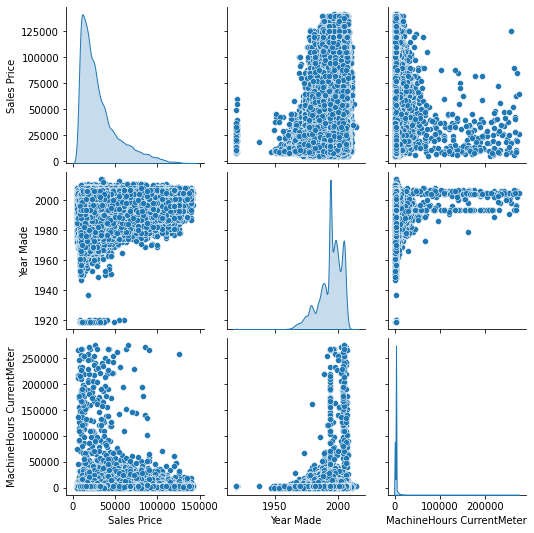

In [184]:
sns.pairplot(train_dataset[["Sales Price", "Year Made", "MachineHours CurrentMeter"]], diag_kind='kde')

In [20]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales Price,412698.0,31215.181414,23141.743695,4750.0,14500.0,24000.0,40000.0,142000.0
datasource,412698.0,135.169361,9.646749,121.0,132.0,132.0,136.0,173.0
Year Made,412698.0,1899.049637,292.190243,1000.0,1985.0,1995.0,2001.0,2014.0
MachineHours CurrentMeter,147504.0,3522.988285,27169.928650,0.0,0.0,0.0,3209.0,2483300.0


In [185]:
x_train = train_dataset.drop(columns=["Sales Price"])
x_test = test_dataset.drop(columns=["Sales Price"])

y_train = train_dataset[["Sales Price"]]
y_test = test_dataset[["Sales Price"]]

In [186]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train[["Year Made", "MachineHours CurrentMeter"]])

In [ ]:
encoder = layers.StringLookup(output_mode='multi_hot')
encoder.adapt(x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"]))
print(encoder(x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"])))
# print(encoder(x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"]).astype('string')))

In [21]:
# def build_and_compile_model(input1, input2):
def build_and_compile_model():
  input_continuous = layers.Input(shape=(2,))
  input_categorical = layers.Input(shape=(46,), dtype=tf.string)

  input_continuous_normalized = normalizer(input_continuous)
  input_categorical_encoded = encoder(input_categorical)

  merged = layers.Concatenate(axis=1)([input_continuous_normalized, input_categorical_encoded])

  dense1 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.005))(merged)
  dense2 = layers.Dense(256, activation='relu')(dense1)
  dropout = layers.Dropout(rate = 0.05)(dense2) 
  dense3 = layers.Dense(64, activation='relu')(dropout)
  outputs = layers.Dense(1)(dense2)

  model = keras.Model(inputs=[input_continuous, input_categorical], outputs=outputs)

  # model = keras.Sequential([
  #     norm,
  #     layers.Dense(64, activation='relu'),
  #     layers.Dense(64, activation='relu'),
  #     layers.Dense(1)
  # ])

  # input = layers.Input(shape=(2,))
  # x = normalizer(input)
  # x = layers.Dense(64, activation='relu')(x)
  # x = layers.Dense(64, activation='relu')(x)
  # x = layers.Dense(1)(x)

  # model = keras.Model(inputs=input, outputs=x)

  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

  return model

In [19]:
print(x_train[["Year Made", "MachineHours CurrentMeter"]].astype(float).shape)
print(x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"]).astype('string').shape)

# dnn_model = build_and_compile_model(x_train[["Year Made", "MachineHours CurrentMeter"]].astype(float),
#                                     x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"]).astype('string'))

dnn_model = build_and_compile_model()
dnn_model.summary()

(104421, 2)
(104421, 46)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 normalization (Normalization)  (None, 2)            5           ['input_3[0][0]']                
                                                                                                  
 string_lookup (StringLookup)   (None, 4582)         0           ['input_4[0][0]']                
                                                                   

In [ ]:
x_train.dtypes

In [ ]:
%%time
history = dnn_model.fit(
    # x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"]),
    [x_train[["Year Made", "MachineHours CurrentMeter"]],
     x_train.drop(columns=["Year Made", "MachineHours CurrentMeter"])],
    y_train,
    validation_split=0.2,
    # validation_data=([x_test[["Year Made", "MachineHours CurrentMeter"]],
    #                   x_test.drop(columns=["Year Made", "MachineHours CurrentMeter"])],
    #                  y_test),
    verbose=1,
    batch_size=128,
    epochs=100)

In [186]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Sales Price]')
  plt.legend()
  plt.grid(True)

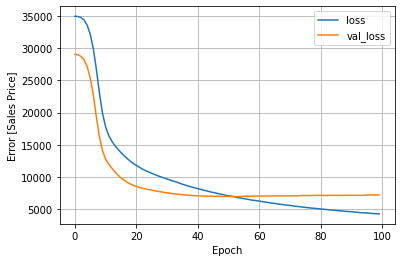

In [187]:
plot_loss(history)

In [188]:
results = dnn_model.evaluate([x_test[["Year Made", "MachineHours CurrentMeter"]],
                              x_test.drop(columns=["Year Made", "MachineHours CurrentMeter"])],
                             y_test,
                             verbose=0)
print(results)

9278.9736328125
